## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [6]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [7]:
train, test = keras.datasets.cifar10.load_data()

In [8]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [9]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W1206 22:06:33.087715  3404 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:107: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W1206 22:06:33.115640  3404 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:111: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1206 22:06:33.124616  3404 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1206 22:06:33.125613  3404 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placehol

Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.1459 - acc: 0.2812 - val_loss: 1.9792 - val_acc: 0.3452
Epoch 2/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9217 - acc: 0.3731 - val_loss: 1.8884 - val_acc: 0.3775
Epoch 3/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8428 - acc: 0.4007 - val_loss: 1.8112 - val_acc: 0.4050
Epoch 4/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.7841 - acc: 0.4227 - val_loss: 1.7620 - val_acc: 0.4288
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.7397 - acc: 0.4374 - val_loss: 1.7261 - val_acc: 0.4401
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.7015 - acc: 0.4521 - val_loss: 1.6967 - val_acc: 0.4463
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.6672 - acc: 0.4631 - val_loss: 1.6688 - val_acc

50000/50000 [==============================] - 2s 39us/step - loss: 1.7908 - acc: 0.3725 - val_loss: 1.7447 - val_acc: 0.3875
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7119 - acc: 0.4015 - val_loss: 1.6905 - val_acc: 0.4148
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6556 - acc: 0.4211 - val_loss: 1.6325 - val_acc: 0.4292
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6098 - acc: 0.4350 - val_loss: 1.6002 - val_acc: 0.4408
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5705 - acc: 0.4520 - val_loss: 1.5689 - val_acc: 0.4485
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5372 - acc: 0.4603 - val_loss: 1.5431 - val_acc: 0.4574
Epoch 8/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5089 - acc: 0.4721 - val_loss: 1.5326 - val_acc: 0.4590
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 39us/step - loss: 1.7232 - acc: 0.3956 - val_loss: 1.6904 - val_acc: 0.4092
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6628 - acc: 0.4164 - val_loss: 1.6498 - val_acc: 0.4234
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6135 - acc: 0.4353 - val_loss: 1.5990 - val_acc: 0.4407
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5737 - acc: 0.4464 - val_loss: 1.5681 - val_acc: 0.4453
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5386 - acc: 0.4606 - val_loss: 1.5512 - val_acc: 0.4510
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5089 - acc: 0.4691 - val_loss: 1.5252 - val_acc: 0.4618
Epoch 9/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.4808 - acc: 0.4779 - val_loss: 1.5087 - val_acc: 0.4619
Epoch 10/50
50000/50000 [===========================

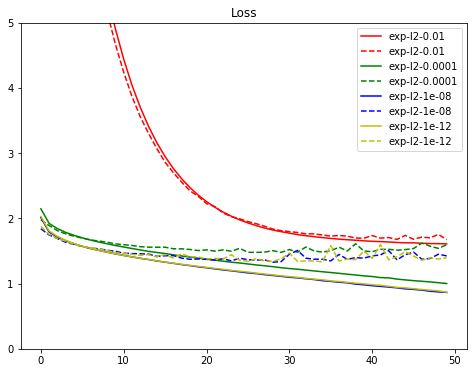

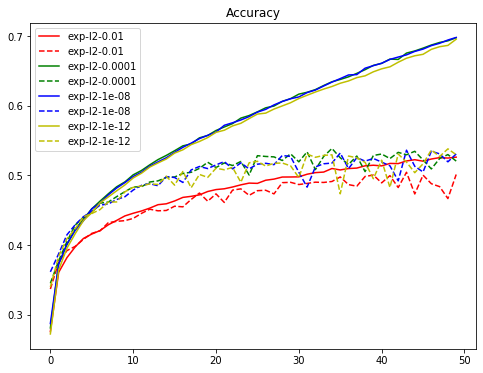

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [16]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [17]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [18]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 45us/step - loss: 6.0136 - acc: 0.2721 - val_loss: 5.8146 - val_acc: 0.3465
Epoch 2/50
50000/50000 [==============================] - 2s 39us/step - loss: 5.7176 - acc: 0.3701 - val_loss: 5.6350 - val_acc: 0.3837
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 5.5689 - acc: 0.3994 - val_loss: 5.5109 - val_acc: 0.4108
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 5.4491 - acc: 0.4180 - val_loss: 5.3989 - val_acc: 0.4189
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 5.3408 - acc: 0.4335 - val_loss: 5.3016 - val_acc: 0.4340
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 5.2397 - acc: 0.4466 - val_loss: 5.2111 - val_acc: 0.4427
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 5.1470 - acc: 0.4572 - val_loss: 5.1127 - val_acc

50000/50000 [==============================] - 2s 40us/step - loss: 1.8017 - acc: 0.3666 - val_loss: 1.7506 - val_acc: 0.3852
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7148 - acc: 0.3983 - val_loss: 1.6845 - val_acc: 0.4078
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6557 - acc: 0.4189 - val_loss: 1.6412 - val_acc: 0.4180
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6086 - acc: 0.4335 - val_loss: 1.6053 - val_acc: 0.4347
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5698 - acc: 0.4492 - val_loss: 1.5724 - val_acc: 0.4412
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5368 - acc: 0.4603 - val_loss: 1.5411 - val_acc: 0.4533
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5055 - acc: 0.4708 - val_loss: 1.5246 - val_acc: 0.4543
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 39us/step - loss: 1.7274 - acc: 0.3926 - val_loss: 1.6936 - val_acc: 0.4025
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6686 - acc: 0.4145 - val_loss: 1.6392 - val_acc: 0.4248
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6218 - acc: 0.4299 - val_loss: 1.6077 - val_acc: 0.4350
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5800 - acc: 0.4429 - val_loss: 1.5836 - val_acc: 0.4353
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5447 - acc: 0.4567 - val_loss: 1.5504 - val_acc: 0.4519
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5142 - acc: 0.4665 - val_loss: 1.5230 - val_acc: 0.4574
Epoch 9/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.4876 - acc: 0.4760 - val_loss: 1.4983 - val_acc: 0.4717
Epoch 10/50
50000/50000 [===========================

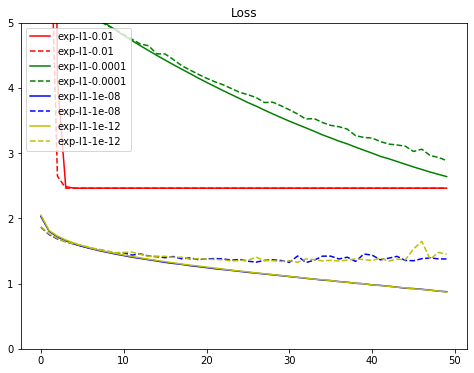

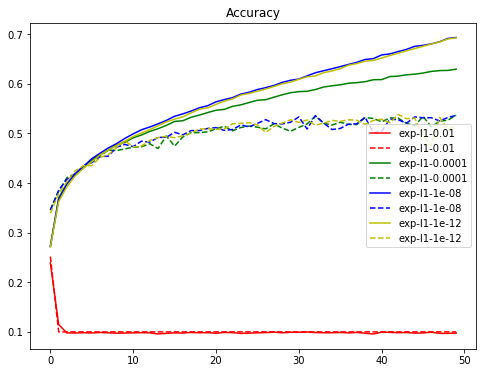

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()